In [76]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [77]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
# we probably don't need name, ticket and cabin columns
train=train.drop(['Name','Ticket','Cabin'],axis=1)

In [80]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

C:\Users\rama4\AppData\Local\Temp\ipykernel_20360\3734351334.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

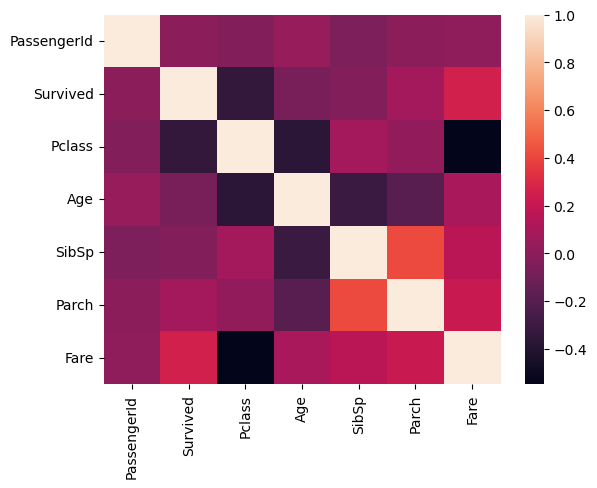

In [81]:
# The age and cabin columns contain many null values, which needs to be filled.
# To do so, we need to find what are the features that age is related to.
# We can do it by showing a correlation between features and present it in a heatmap for convenience.
sns.heatmap(train.corr())

In [82]:
# looks like Pclass is the closese to age. lets find the mean and median ages for each Pclass
print(train.groupby('Pclass', as_index=False)['Age'].median())
print(train.groupby('Pclass', as_index=False)['Age'].mean())

   Pclass   Age
0       1  37.0
1       2  29.0
2       3  24.0
   Pclass        Age
0       1  38.233441
1       2  29.877630
2       3  25.140620


In [83]:
# Based on the above data, lets fill the null entries of age based on the median of their Pclass:
def getAge(x):
    age=x[0]
    pclass=x[1]
    if not np.isnan(age):
        return age
    else:
        if pclass == 1:
            return 37
        elif pclass== 2:
            return 29
        else:
            return 24

def getAge2(x):
    age=x[0]
    pclass=x[1]
    if np.isnan(age):
        if pclass ==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return age
    

train['Age']=train[['Age','Pclass']].apply(getAge2,axis=1)

In [84]:
# Lets transform the Sex and Embarked features into integers using one-hot-encoding
# Note that the Embarked value is understood as 'C' if both 'Embarked_Q and 'Embarked_S' are 0
train=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)
train

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0              1         0       3  22.0      1      0   7.2500         1   
1              2         1       1  38.0      1      0  71.2833         0   
2              3         1       3  26.0      0      0   7.9250         0   
3              4         1       1  35.0      1      0  53.1000         0   
4              5         0       3  35.0      0      0   8.0500         1   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000         1   
887          888         1       1  19.0      0      0  30.0000         0   
888          889         0       3  25.0      1      2  23.4500         0   
889          890         1       1  26.0      0      0  30.0000         1   
890          891         0       3  32.0      0      0   7.7500         1   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 10 columns]

In [85]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
X=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split

X=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [86]:
gb_parameter={'gbclassifier__n_estimators':[80,90,100,110,150],
           'gbclassifier__criterion': ['friedman_mse', 'squared_error', 'mse'],
           'gbclassifier__max_depth': [1,2,3,4,5],
           'gbclassifier__max_features':['auto','sqrt','log2']}

gbmodel_hyper=GridSearchCV(pipegb,param_grid=gb_parameter,scoring='accuracy',cv=5)
gbmodel_hyper.fit(X_train,y_train)
pred=gbmodel_hyper.predict(X_test)

c:\Users\rama4\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rama4\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rama4\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rama4\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rama4\a

In [87]:
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       177
           1       0.69      0.85      0.76        91

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.82      0.82       268

[[143  34]
 [ 14  77]]


In [88]:
gbmodel_hyper.best_params_

{'gbclassifier__criterion': 'friedman_mse',
 'gbclassifier__max_depth': 3,
 'gbclassifier__max_features': 'sqrt',
 'gbclassifier__n_estimators': 90}

In [89]:
str(gbmodel_hyper.best_estimator_)

"Pipeline(steps=[('gbclassifier',\n                 GradientBoostingClassifier(max_features='sqrt',\n                                            n_estimators=90))])"

In [90]:
"""
{'gbclassifier__criterion': 'squared_error',
 'gbclassifier__max_depth': 4,
 'gbclassifier__max_features': 'log2',
 'gbclassifier__n_estimators': 80}
"""
current_tuned_model = GradientBoostingClassifier(criterion='squared_error', max_depth=10, max_features='log2', n_estimators=80)
X=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

current_tuned_model.fit(X_train,y_train)

pred=current_tuned_model.predict(X_test)
pred

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
print(accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       174
           1       0.69      0.82      0.75        94

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268

[[140  34]
 [ 17  77]]
0.8097014925373134


In [91]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(current_tuned_model,X,y,cv=10)
print(cvs.mean())
cvs

0.8025343320848938


array([0.74444444, 0.79775281, 0.74157303, 0.75280899, 0.87640449,
       0.78651685, 0.84269663, 0.84269663, 0.82022472, 0.82022472])

In [92]:
test['Age']=test[['Age','Pclass']].apply(getAge2,axis=1)
test=pd.get_dummies(test,columns=['Sex','Embarked'],drop_first=True)
test=test.drop(['Name','Ticket','Cabin'],axis=1)
test

PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0            892       3  34.5      0      0    7.8292         1           1   
1            893       3  47.0      1      0    7.0000         0           0   
2            894       2  62.0      0      0    9.6875         1           1   
3            895       3  27.0      0      0    8.6625         1           0   
4            896       3  22.0      1      1   12.2875         0           0   
..           ...     ...   ...    ...    ...       ...       ...         ...   
413         1305       3  25.0      0      0    8.0500         1           0   
414         1306       1  39.0      0      0  108.9000         0           0   
415         1307       3  38.5      0      0    7.2500         1           0   
416         1308       3  25.0      0      0    8.0500         1           0   
417         1309       3  25.0      1      1   22.3583         1           0   

     Embarked_S  
0             0  
1             1  
2             0  
3             1  
4             1  
..          ...  
413           1  
414           0  
415           1  
416           1  
417           0  

[418 rows x 9 columns]

In [93]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [94]:
# fareindex=test[np.isnan(test['Fare'])==True].index
# fareindex
# test=test.drop(fareindex)
nanfareid=test[test['Fare']==np.isnan(test['Fare'])]
nanfareid
# dont use numpy isnan in pandas operations

PassengerId  Pclass   Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  \
266         1158       1  38.0      0      0   0.0         1           0   
372         1264       1  49.0      0      0   0.0         1           0   

     Embarked_S  
266           1  
372           1

In [95]:
test[test['Fare'].isnull()==True]['Fare']

152   NaN
Name: Fare, dtype: float64

In [96]:
nullfareid=test[test['Fare'].isnull()==True]['Fare'].index
nullfareid

Int64Index([152], dtype='int64')

In [97]:
test[test['Fare'].isnull()==True]['Fare']

152   NaN
Name: Fare, dtype: float64

In [98]:
test['Fare'][nullfareid]=test[test['Pclass']==1]['Fare'].mean()

C:\Users\rama4\AppData\Local\Temp\ipykernel_20360\2865429626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][nullfareid]=test[test['Pclass']==1]['Fare'].mean()


In [99]:
test['Fare'][nullfareid]

152    94.280297
Name: Fare, dtype: float64

In [100]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [101]:
test[test['Fare']==np.isnan]

Empty DataFrame
Columns: [PassengerId, Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S]
Index: []

In [102]:
print(test.shape)
print(train.shape)

(418, 9)
(891, 10)


In [103]:
pred=current_tuned_model.predict(test) # tto be interchanged with other models for varied results
pred=pd.DataFrame(pred)
pred.columns=['Survived']
pred

Survived
0           0
1           0
2           0
3           0
4           0
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]

In [104]:
answer=pd.concat([test['PassengerId'],pred],axis=1)
answer

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [105]:
answer.to_csv('submission.csv',index=False)